In [1]:
import os
import sys
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Modules dir
project_path = "<PATH-TO-REPO>/BiMAEB-UDD-RUL/"
sys.path.insert(0, project_path)

from Modules.Models import RULNeuralNetwork
from experimental_results.functions import (normalize_df,
                                            view_RUL_stats,
                                            view_performance_on_data,
                                            get_model_rul_predictions,
                                            get_scores,
                                            get_mse,
                                            plot_unit_recon_error_and_threshold,
                                            plot_rul_predictions_and_targets,
                                            normalize_df_with_context,
                                            TURBOFAN_FEATURES_LIST)

In [2]:
normal_op_len = 45
norm_op_len_as_pct = True

dataset = "FD002"
model_type = "AE"
prefix = "Pct" if norm_op_len_as_pct else "Len"


print(f"Normality: {normal_op_len} {prefix}")

Normality: 45 Pct


In [4]:
model_name = f"normOp{prefix}{normal_op_len}_RUL_{model_type}"

path_to_training_data_dir = "<PATH-TO-DATA-DIR>/NASA_turbofan_data/train"
path_to_testing_data_dir = "<PATH-TO-DATA-DIR>/NASA_turbofan_data/validation"

# Define file names
csv_file_training = f"{dataset}_train_unsupervised_labels_AutoEncoder_Op{prefix}{normal_op_len}.csv"
csv_file_testing = f"{dataset}_test_unsupervised_labels_AutoEncoder_Op{prefix}{normal_op_len}.csv"

# Define paths
dataset_path_training = os.path.join(path_to_training_data_dir, csv_file_training)
dataset_path_testing = os.path.join(path_to_testing_data_dir, csv_file_testing)

path_to_model_state_dict = f"models/{model_name}_model_state_dict"

print(f"Model Path: {path_to_model_state_dict}")

Model Path: models/normOpPct45_RUL_AE_model_state_dict


In [5]:
# Read original data
print(f"Reading dataset: \n{dataset_path_testing}\n")
print(f"Reading dataset: \n{dataset_path_training}")

df_testing_not_normalized = pd.read_csv(dataset_path_testing)
df_training_not_normalized = pd.read_csv(dataset_path_training)

Reading dataset: 
/Users/rafaeltoche/Documents/School/Research/Rainwaters_Lab/DART-LP2/Condition_Monitoring/data/NASA_turbofan_data/validation/FD002_test_unsupervised_labels_AutoEncoder_OpPct45.csv

Reading dataset: 
/Users/rafaeltoche/Documents/School/Research/Rainwaters_Lab/DART-LP2/Condition_Monitoring/data/NASA_turbofan_data/train/FD002_train_unsupervised_labels_AutoEncoder_OpPct45.csv


In [6]:
print("Normalizing datasets...\n")

# Normalize testing data using training data as the context.
df_testing_normalized = normalize_df_with_context(df=df_testing_not_normalized,
                                                  df_context=df_training_not_normalized,
                                                  model_features=TURBOFAN_FEATURES_LIST)

Normalizing datasets...



In [8]:
# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using Device: {}".format(device))

Using Device: cpu


In [9]:
window_size = 1
metrics_dir = "model"
ts_number_features = len(TURBOFAN_FEATURES_LIST)
latent_size = 16

print(f"Normality Length: {normal_op_len}")
print(f"Latent Size: {latent_size}")
print(f"Number ts features: {ts_number_features}")

Normality Length: 45
Latent Size: 16
Number ts features: 24


In [10]:
model = RULNeuralNetwork(ts_number_features=ts_number_features,
                         device=device,
                         model_name="",
                         metrics_dir=metrics_dir)

print(f"Reading model at '{path_to_model_state_dict}'")
model.load_state_dict(torch.load(path_to_model_state_dict, map_location=torch.device(device)))

Reading model at 'models/normOpPct45_RUL_AE_model_state_dict'


<All keys matched successfully>

In [11]:
view_performance_on_data(model=model, 
                         df=df_testing_normalized, 
                         identifier_col="unit", 
                         cycle_col="cycle", 
                         rul_col="RUL", 
                         fault_col="fault")

Computing RUL for Unit 1 (on cycle=258)
Target: 18 --> Pred.:  19

Computing RUL for Unit 2 (on cycle=55)
Target: 79 --> Pred.:  73

Computing RUL for Unit 3 (on cycle=165)
Target: 106 --> Pred.:  83

Computing RUL for Unit 4 (on cycle=86)
Target: 110 --> Pred.:  81

Computing RUL for Unit 5 (on cycle=148)
Target: 15 --> Pred.:  16

Computing RUL for Unit 6 (on cycle=63)
Target: 155 --> Pred.:  127

Computing RUL for Unit 7 (on cycle=184)
Target: 6 --> Pred.:  9

Computing RUL for Unit 8 (on cycle=173)
Target: 90 --> Pred.:  46

Computing RUL for Unit 9 (on cycle=161)
Target: 11 --> Pred.:  5

Computing RUL for Unit 10 (on cycle=84)
Target: 79 --> Pred.:  84

Computing RUL for Unit 11 (on cycle=162)
Target: 6 --> Pred.:  13

Computing RUL for Unit 12 (on cycle=74)
Target: 73 --> Pred.:  105

Computing RUL for Unit 13 (on cycle=164)
Target: 30 --> Pred.:  44

Computing RUL for Unit 14 (on cycle=160)
Target: 11 --> Pred.:  11

Computing RUL for Unit 15 (on cycle=165)
Target: 37 --> Pred.

Computing RUL for Unit 131 (on cycle=73)
Target: 120 --> Pred.:  108

Computing RUL for Unit 132 (on cycle=122)
Target: 39 --> Pred.:  65

Computing RUL for Unit 133 (on cycle=186)
Target: 38 --> Pred.:  28

Computing RUL for Unit 134 (on cycle=186)
Target: 9 --> Pred.:  7

Computing RUL for Unit 135 (on cycle=120)
Target: 167 --> Pred.:  139

Computing RUL for Unit 136 (on cycle=77)
Target: 87 --> Pred.:  32

Computing RUL for Unit 137 (on cycle=226)
Target: 88 --> Pred.:  61

Computing RUL for Unit 138 (on cycle=200)
Target: 7 --> Pred.:  7

Computing RUL for Unit 139 (on cycle=116)
Target: 51 --> Pred.:  66

Computing RUL for Unit 140 (on cycle=306)
Target: 55 --> Pred.:  56

Computing RUL for Unit 141 (on cycle=69)
Target: 155 --> Pred.:  76

Computing RUL for Unit 142 (on cycle=163)
Target: 47 --> Pred.:  28

Computing RUL for Unit 143 (on cycle=226)
Target: 81 --> Pred.:  46

Computing RUL for Unit 144 (on cycle=143)
Target: 43 --> Pred.:  43

Computing RUL for Unit 145 (on cycle

In [12]:
list(df_testing_normalized.query("fault==1")["unit"].unique())

[1,
 5,
 7,
 9,
 14,
 19,
 22,
 32,
 43,
 44,
 45,
 50,
 52,
 58,
 64,
 65,
 68,
 70,
 76,
 78,
 80,
 85,
 90,
 91,
 99,
 100,
 103,
 116,
 124,
 129,
 133,
 134,
 138,
 139,
 140,
 148,
 150,
 158,
 159,
 161,
 164,
 171,
 173,
 176,
 177,
 182,
 185,
 186,
 190,
 195,
 208,
 210,
 211,
 227,
 231,
 236,
 242,
 245,
 250,
 252,
 257]

Predicted 41 Samples in unit 245
Score: 84.3799940795003
MSE: 132.6216876525739


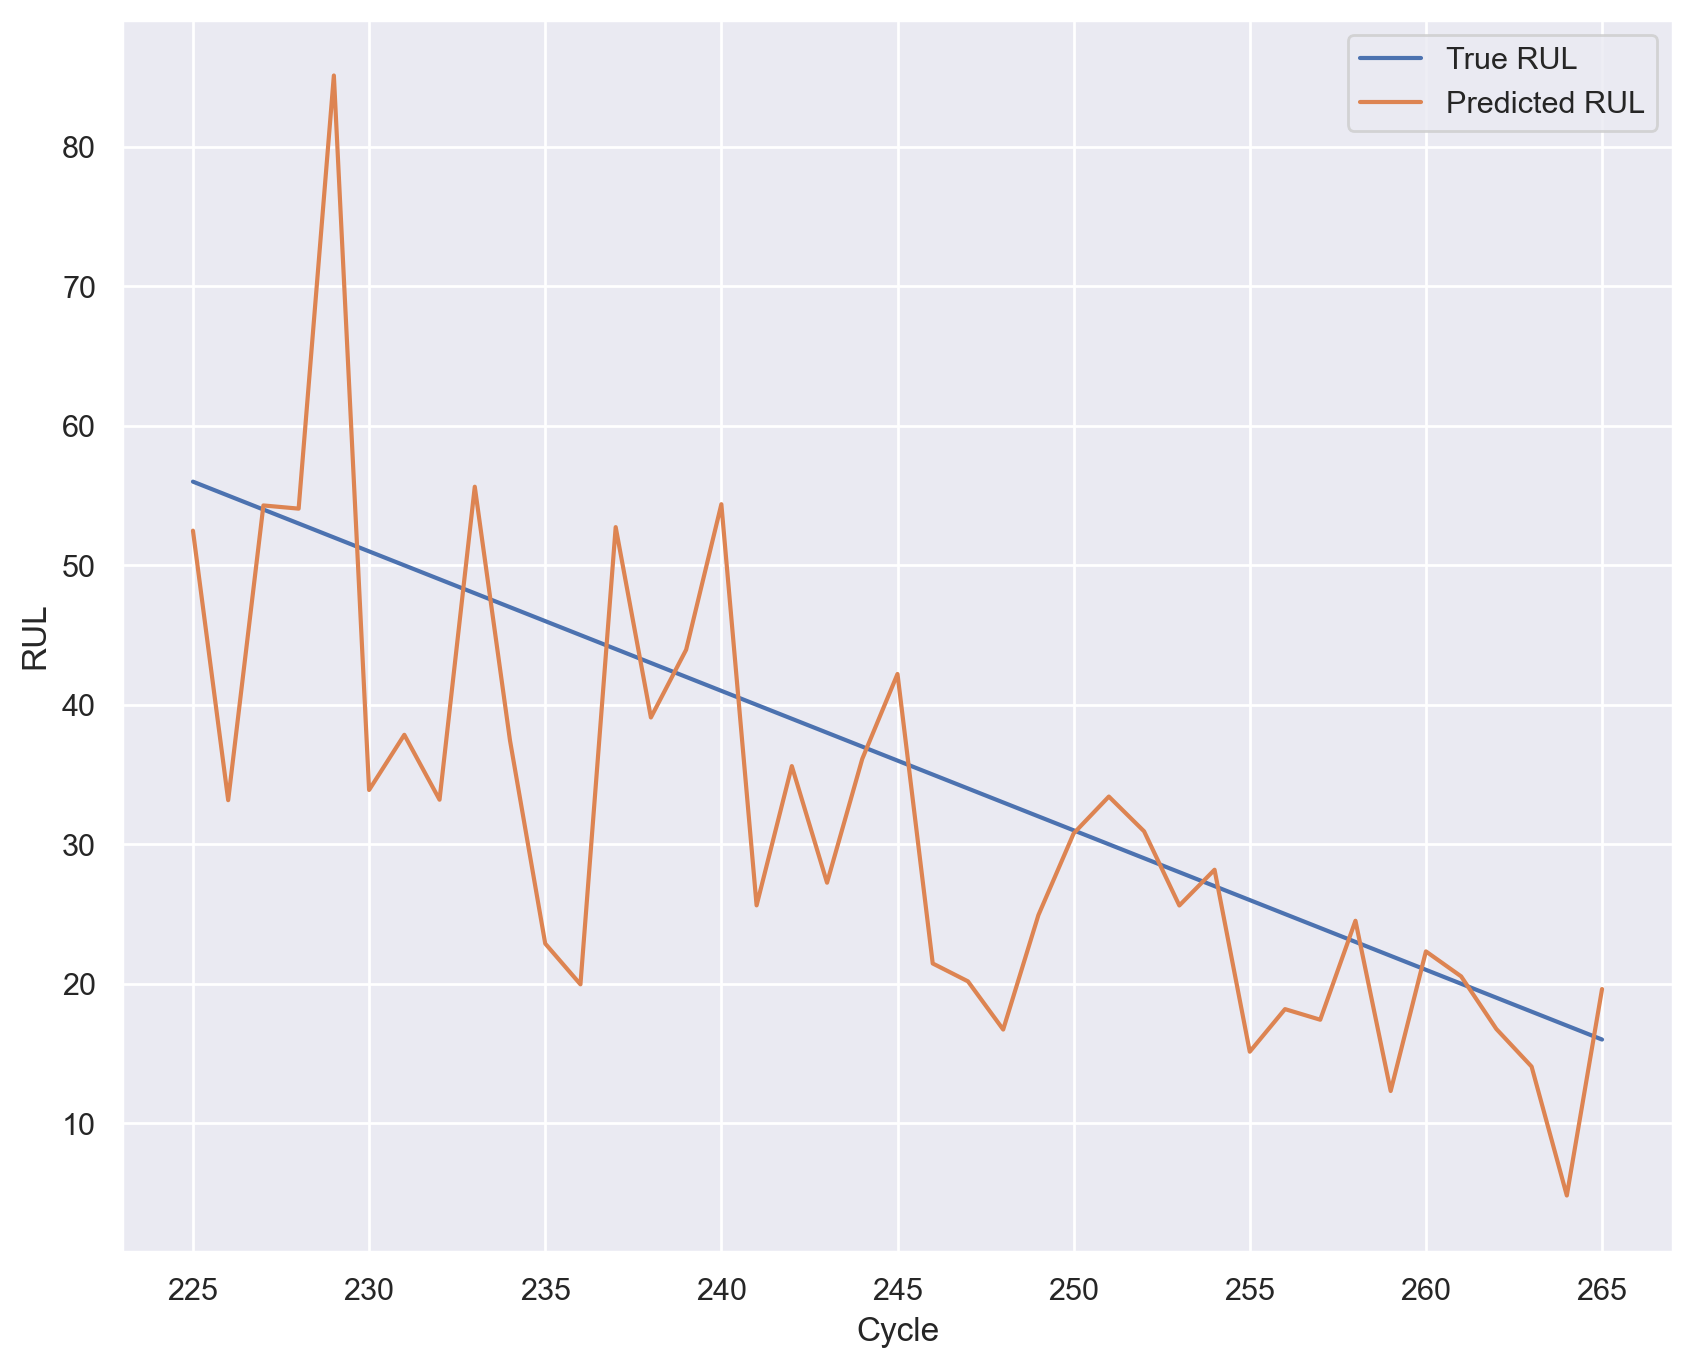

In [13]:
unit = 245
query_faults = True

df_unit = df_testing_normalized.query(f"unit=={unit}")
if query_faults:
    df_unit = df_unit.query("fault==1")
features = df_unit[TURBOFAN_FEATURES_LIST].to_numpy()
targets = df_unit["RUL"].to_numpy()
cycles = df_unit["cycle"].to_numpy()

rul_predictions = get_model_rul_predictions(model, features)
print(f"Predicted {len(rul_predictions)} Samples in unit {unit}")
plot_rul_predictions_and_targets(rul_predictions, targets=targets, cycles=cycles)